In [3]:
from sklearn.datasets import load_
bc = load_breast_cancer()
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
#

# Dataset Info


In [7]:
bc.target[500]
bc.target.shape


(569,)

In [8]:
bc.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [9]:
bc.data.shape

(569, 30)

# Preprocessing

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(bc.data, bc.target, test_size=0.2)
print(f"feature  > train : {x_train.shape} - test : {x_test.shape}")
print(f"Lable -> Train : {y_train.shape} - test : {y_test.shape}")




feature  > train : (455, 30) - test : (114, 30)
Lable -> Train : (455,) - test : (114,)


In [12]:
x_train[0]

array([1.305e+01, 1.384e+01, 8.271e+01, 5.306e+02, 8.352e-02, 3.735e-02,
       4.559e-03, 8.829e-03, 1.453e-01, 5.518e-02, 3.975e-01, 8.285e-01,
       2.567e+00, 3.301e+01, 4.148e-03, 4.711e-03, 2.831e-03, 4.821e-03,
       1.422e-02, 2.273e-03, 1.473e+01, 1.740e+01, 9.396e+01, 6.724e+02,
       1.016e-01, 5.847e-02, 1.824e-02, 3.532e-02, 2.107e-01, 6.580e-02])

In [38]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))

x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)



x_test.shape

(114, 30)

# Classification


In [35]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true = y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test )

    p = precision_score(y_true = y_test,y_pred = y_pred_test)
    r = recall_score(y_true = y_test, y_pred=y_pred_test)

    print(f"acc train: {acc_train}-acc test : {acc_train} - percesion : {p} - recall: {r}")
    return acc_train,acc_test,p,r

# 1. Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train,y_train)


GaussianNB()

In [39]:
y_pred_train  =gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb,acc_test_gnb,p_gnb,r_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9494505494505494-acc test : 0.9494505494505494 - percesion : 0.9146341463414634 - recall: 1.0


# 2.KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [72]:
y_pred_train  =knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn,acc_test_knn,p_knn,r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.978021978021978-acc test : 0.978021978021978 - percesion : 0.9466666666666667 - recall: 0.9466666666666667


# 3.Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=64, min_samples_split=4 , criterion='gini')
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=64, min_samples_split=4)

In [50]:
y_pred_train  =dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt,acc_test_dt,p_dt,r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9978021978021978-acc test : 0.9978021978021978 - percesion : 0.9459459459459459 - recall: 0.9333333333333333


# 4. Randon Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, max_depth=32, min_samples_split=4)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=32, min_samples_split=4, n_estimators=500)

In [54]:
y_pred_train  =rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf,acc_test_rf,p_rf,r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 1.0-acc test : 1.0 - percesion : 0.961038961038961 - recall: 0.9866666666666667


# 5.SVM


In [55]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)


SVC()

In [56]:
y_pred_train  =svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm,acc_test_svm,p_svm,r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9824175824175824-acc test : 0.9824175824175824 - percesion : 0.9605263157894737 - recall: 0.9733333333333334


# 6. Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [59]:
y_pred_train  =lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr,acc_test_lr,p_lr,r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.978021978021978-acc test : 0.978021978021978 - percesion : 0.9367088607594937 - recall: 0.9866666666666667


# 7.ANN

In [70]:
from sklearn.neural_network import MLPClassifier


ann = MLPClassifier(hidden_layer_sizes=512)

ann.fit(x_train,y_train)

C:\Users\AhmadReza Shiravi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=512)

In [71]:
y_pred_train  =ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann,acc_test_ann,p_ann,r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train: 0.9868131868131869-acc test : 0.9868131868131869 - percesion : 0.9866666666666667 - recall: 0.9866666666666667


# Comparison

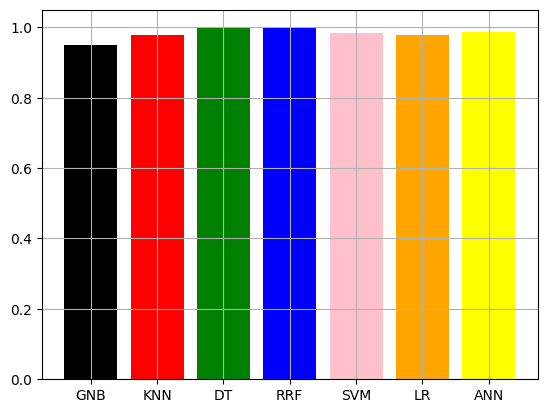

In [77]:
import matplotlib.pyplot as plt

acc_train=[acc_train_gnb,acc_train_knn,acc_train_dt,acc_train_rf,acc_train_svm,acc_train_lr,acc_train_ann]
title= ["GNB","KNN","DT","RRF","SVM","LR","ANN"]
color=["black","red","green","blue","pink","orange","yellow"]
plt.bar(title,acc_train,color=color)
plt.grid()
plt.show()

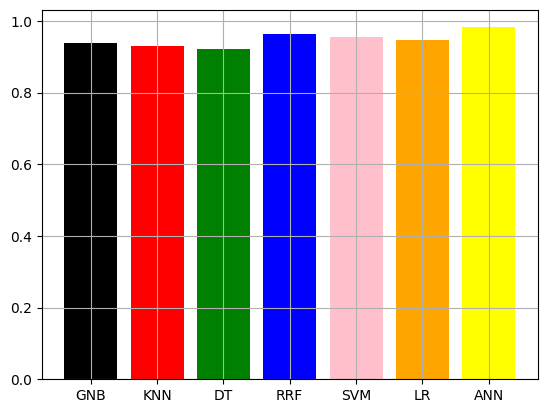

In [80]:
acc_test=[acc_test_gnb,acc_test_knn,acc_test_dt,acc_test_rf,acc_test_svm,acc_test_lr,acc_test_ann]
title= ["GNB","KNN","DT","RRF","SVM","LR","ANN"]
color=["black","red","green","blue","pink","orange","yellow"]
plt.bar(title,acc_test,color=color)
plt.grid()
plt.show()

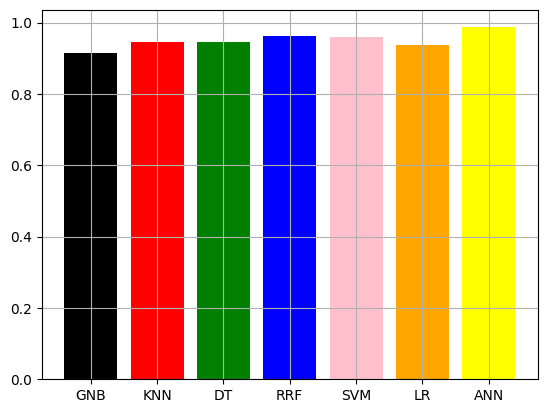

In [81]:
p=[p_gnb,p_knn,p_dt,p_rf,p_svm,p_lr,p_ann]
title= ["GNB","KNN","DT","RRF","SVM","LR","ANN"]
color=["black","red","green","blue","pink","orange","yellow"]
plt.bar(title,p,color=color)
plt.grid()
plt.show()

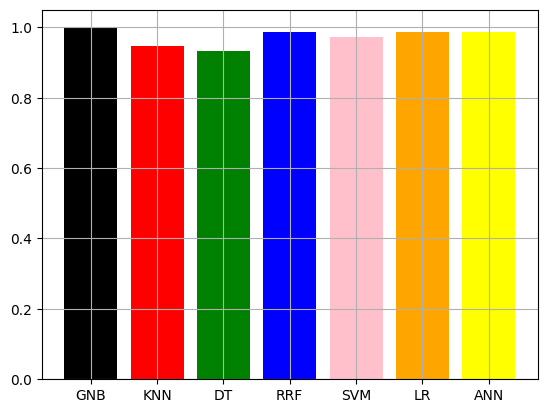

In [82]:
r=[r_gnb,r_knn,r_dt,r_rf,r_svm,r_lr,r_ann]
title= ["GNB","KNN","DT","RRF","SVM","LR","ANN"]
color=["black","red","green","blue","pink","orange","yellow"]
plt.bar(title,r,color=color)
plt.grid()
plt.show()